<a href="https://colab.research.google.com/github/malakbayramovaa/Machine-Learning/blob/main/training_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

np.random.seed(42)
m=100
X=2*np.random.rand(m, 1)
y=4+3*X+np.random.randn(m, 1)

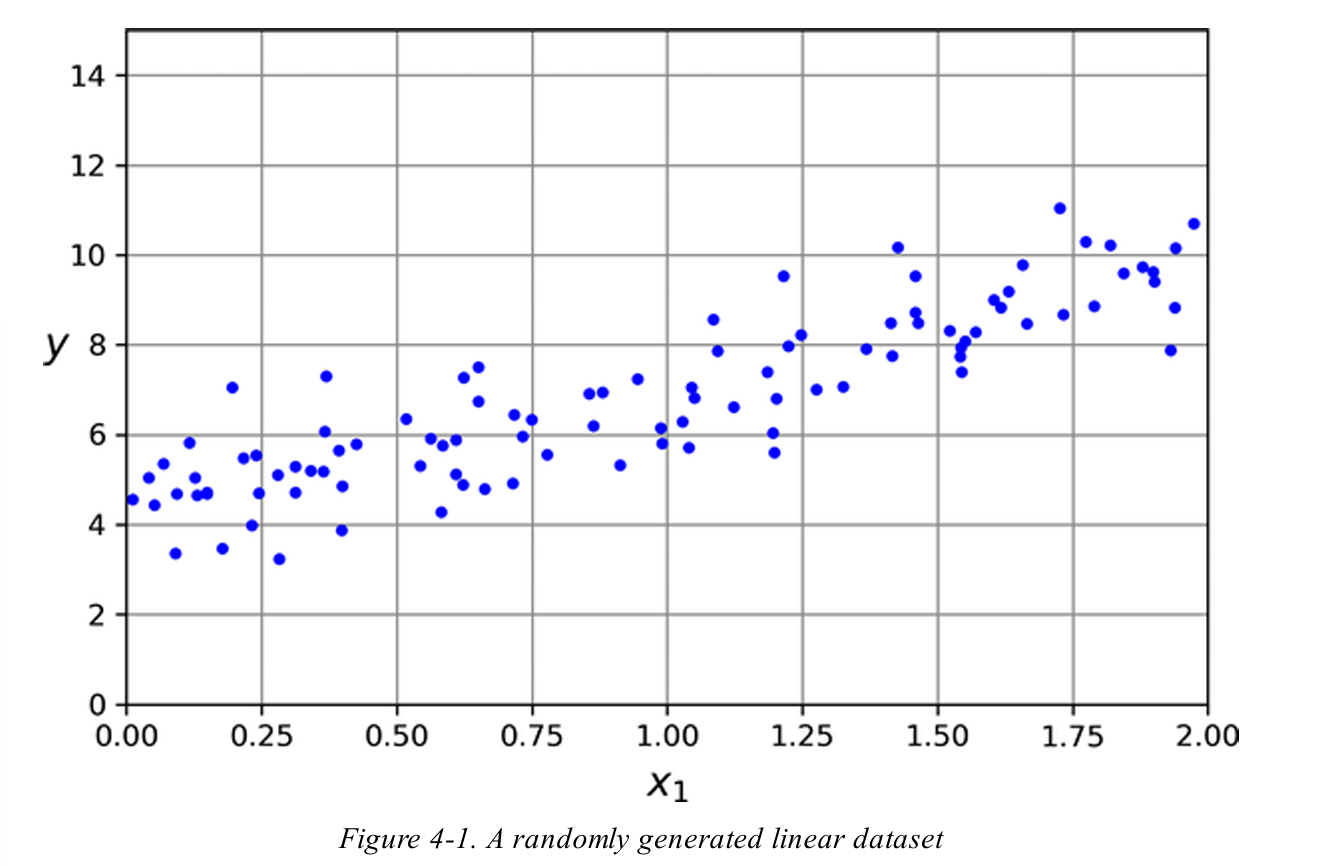

In [2]:
from sklearn.preprocessing import add_dummy_feature

X_b=add_dummy_feature(X)
theta_best=np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [3]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [4]:
X_new=np.array([[0],[2]])
X_new_b=add_dummy_feature(X_new)
y_predict=X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

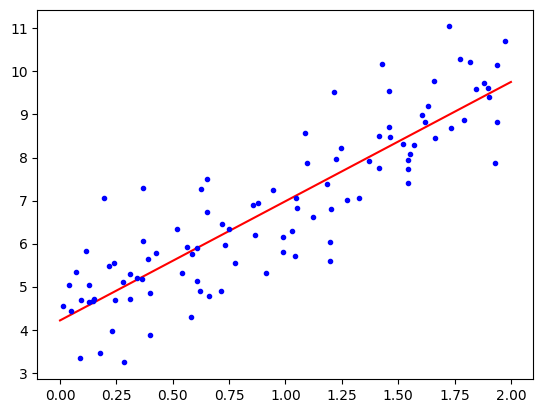

In [5]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_


(array([4.21509616]), array([[2.77011339]]))

In [7]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [8]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [9]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

# Batch Gradient Descent


In [10]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  gradients = 2 / m * X_b.T @ (X_b @ theta -y)
  theta = theta - eta * gradients

In [11]:
theta

array([[4.21509616],
       [2.77011339]])

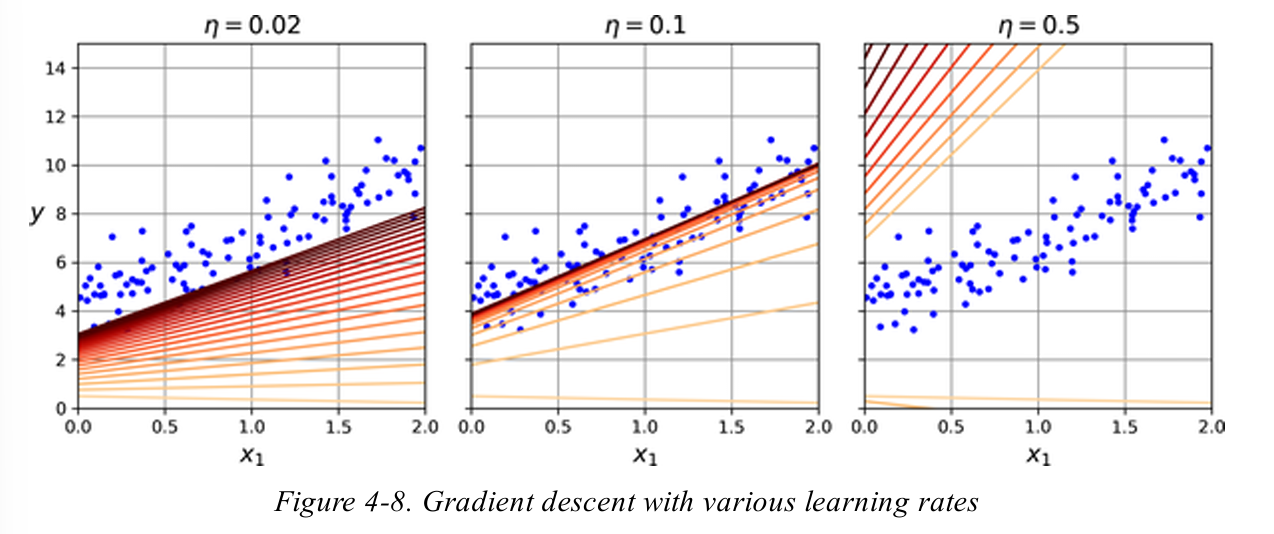

# Stochastic Gradient Descent

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.21076011],
       [2.74856079]])

Qeyd edək ki, instances random şəkildə seçildiyi üçün, bir epoch ərzində bəzi instances bir neçə dəfə seçilə bilər, digərləri isə ümumiyyətlə seçilməyə bilər. Əgər hər epoch-da alqoritmin bütün instances-lardan keçdiyinə əmin olmaq istəyirsinizsə, alternativ bir yanaşma training set-i shuffle etməkdir (bu zaman input features və labels birlikdə shuffle edilməlidir), sonra dataset-dən instance-by-instance keçmək, daha sonra isə yenidən shuffle etmək və bu prosesi təkrarlamaqdır.

Lakin bu yanaşma daha complex-dir və adətən nəticəni nəzərəçarpacaq dərəcədə improve etmir.

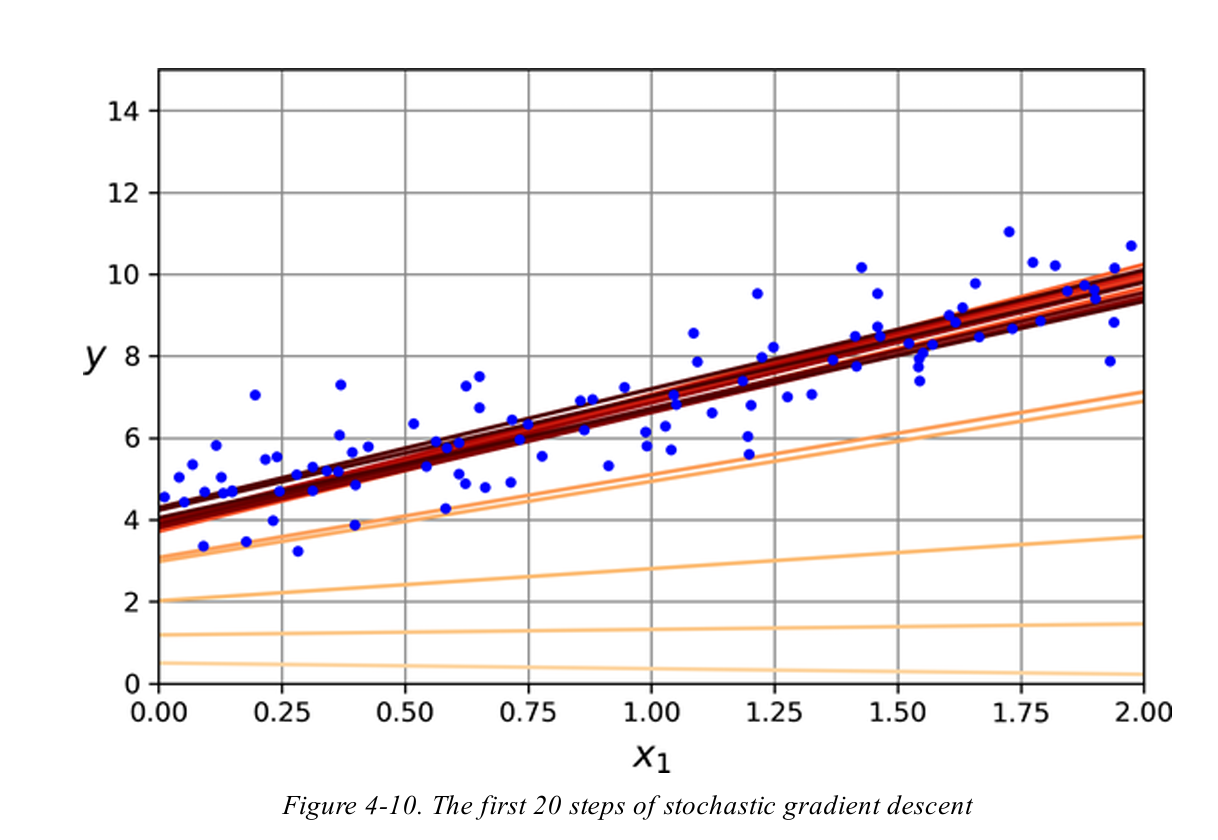

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [15]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

#Mini-Batch Gradient Descent

In [16]:
np.random.seed(42)
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

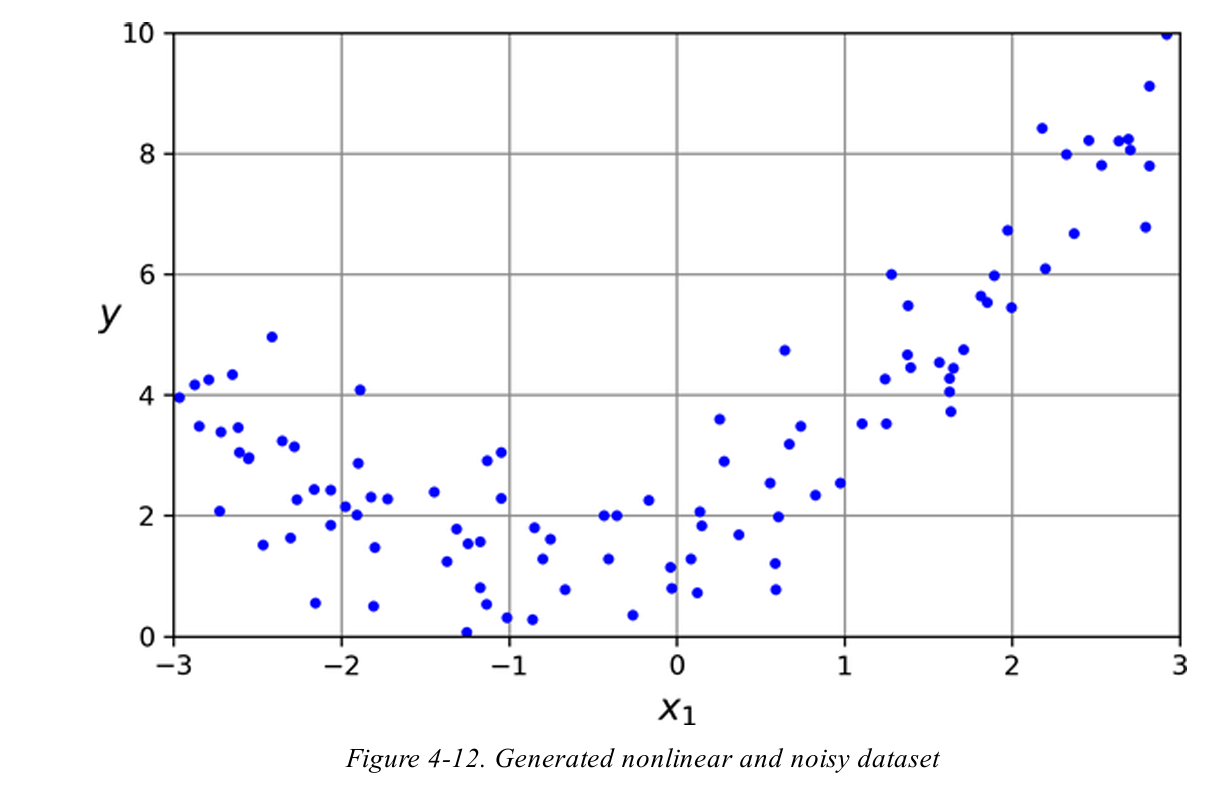

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0]



array([-0.75275929])

In [18]:
X_poly[0]

array([-0.75275929,  0.56664654])

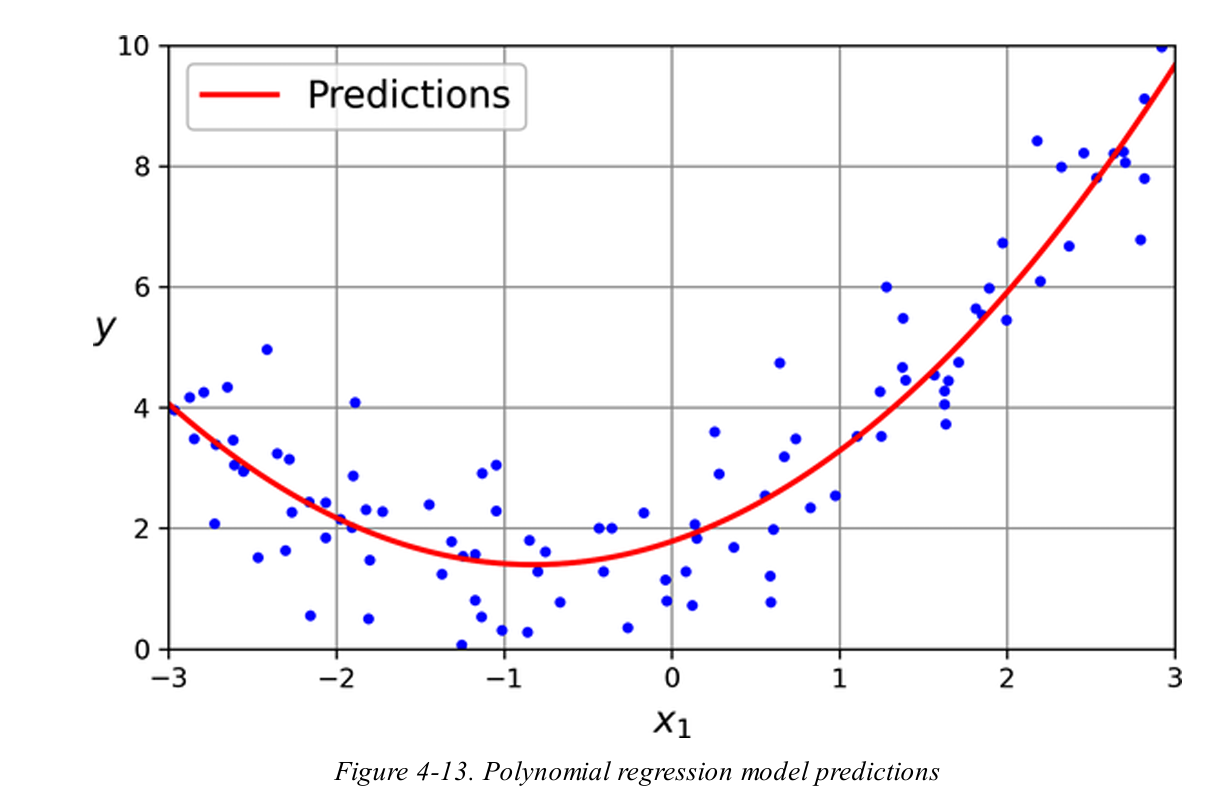

# Learning Curves

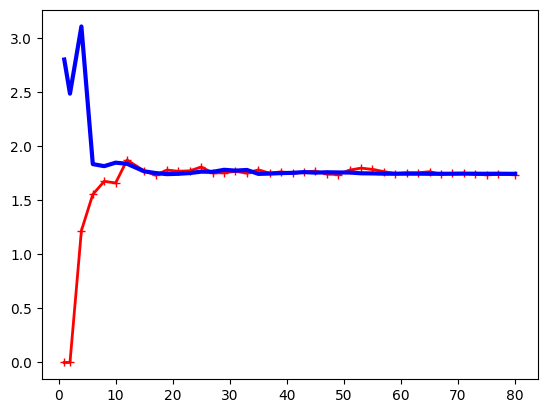

In [19]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes = np.linspace(0.01, 1.0, 40), cv=5,
    scoring = 'neg_root_mean_squared_error'
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=3, label='valid')
plt.show()

In [20]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
                                                         scoring='neg_root_mean_squared_error')

#Regularized Linear Models

#Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [22]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.001, random_state=42, tol=None)

In [23]:
sgd_reg.predict([[1.5]])

array([4.82830117])

# Lasso Regression

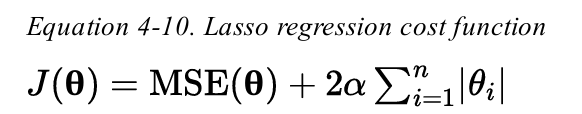

In [24]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

# Elastic Net Regression

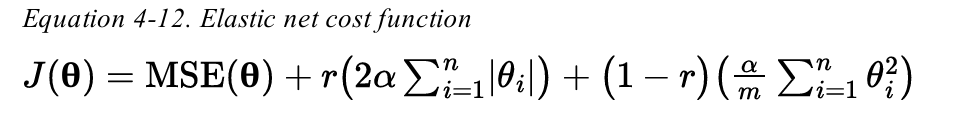

In [26]:
from sklearn.linear_model import ElasticNet
elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

# Early Stopping

In [34]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
  sgd_reg.partial_fit(X_train_prep, y_train.ravel()) # .ravel() is added to convert y_train to 1D array
  y_valid_predict = sgd_reg.predict(X_valid_prep)
  # Calculate RMSE manually as `squared=False` is not supported in this sklearn version
  val_error = np.sqrt(mean_squared_error(y_valid, y_valid_predict))
  if val_error < best_valid_rmse:
    best_valid_rmse = val_error
    best_model = deepcopy(sgd_reg)


# Decision Boundaries

In [35]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)


['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [36]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [37]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [38]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [39]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[['petal width (cm)']].values
y = iris.target_names[iris.target] == 'virginica'

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

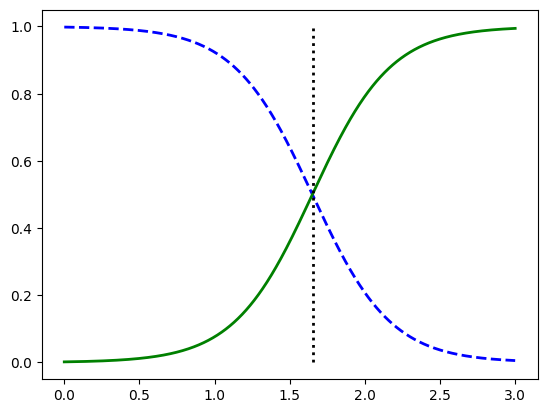

In [42]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[:, 0], 'b--', linewidth=2,
          label = 'Not Iris virginica proba')
plt.plot(X_new, y_proba[:,1], 'g-', linewidth=2, label='Iris virginica proba')
plt.plot([decision_boundary, decision_boundary], [0,1], 'k:', linewidth=2,
         label='Decision boundary')
plt.show()

In [43]:
decision_boundary

np.float64(1.6516516516516517)

In [44]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

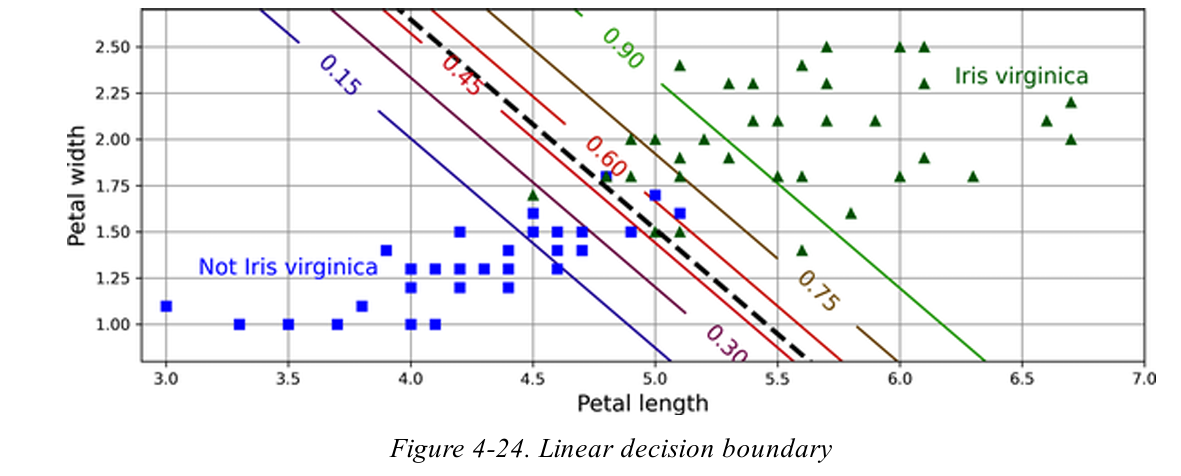

# Softmax

In [45]:
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [46]:
softmax_reg.predict([[5, 2]])


array([2])

In [48]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])